In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import evophys.models.binding.ssb as ssb

%matplotlib inline

In [37]:
m1 = {"nk":1, "k1":1e7}
m2noCoop = {"nk":2, "k1":1e7, "k2":1e7, "f12":1}
m2Coop = {"nk":2, "k1":1e7, "k2":1e7, "f12":10}
m2negCoop = {"nk":2, "k1":1e7, "k2":1e7, "f12":.1}

ssb1 = ssb.SSBdynam(m1)
ssb2noCoop = ssb.SSBdynam(m2noCoop)
ssb2Coop = ssb.SSBdynam(m2Coop)
ssb2negCoop = ssb.SSBdynam(m2negCoop)

In [38]:
k1 = 1e7
ks = [k1]
is_first = True

for i in xrange(19):
    if is_first:
        higher = k1 + 10000
        lower = k1 - 10000
        is_first = False
    else:
        higher = higher + 10000
        lower = lower - 10000
    ks.append(higher)
    ks.append(lower)

ks.sort()

In [39]:
def fitness(target,comp,selection_strength=1):
    '''Compute rmsd between two input binding curves and return a normally 
    distributed fitness function with variance parameter self.selection_strength'''
    assert len(comp) == len(target)
    rmsd = np.sqrt(sum(map(lambda (x,y): (x-y)**2, zip(target,comp)))/len(target))
    return np.exp(-(rmsd**2)/2*selection_strength)

In [40]:
m1s = []
m2s_noCoop = []
m2s_Coop = []
m2s_negCoop = []

for k in ks:
    s1 = ssb.SSBdynam({"nk":1, "k1":k})
    s2nc = ssb.SSBdynam({"nk":2, "k1":k, "k2":1e7, "f12":1})
    s2c = ssb.SSBdynam({"nk":2, "k1":k, "k2":1e7, "f12":10})
    s2neg = ssb.SSBdynam({"nk":2, "k1":k, "k2":1e7, "f12":.1})
    m1s.append(s1)
    m2s_noCoop.append(s2nc)
    m2s_Coop.append(s2c)
    m2s_negCoop.append(s2neg)

In [41]:
m1s_dists = []
m2s_noCoop_dists = []
m2s_Coop_dists = []
m2s_negCoop_dists = []

for i in range(len(ks)):
    m1s_dists.append(fitness(ssb1.output,m1s[i].output))
    m2s_noCoop_dists.append(fitness(ssb2noCoop.output,m2s_noCoop[i].output))
    m2s_Coop_dists.append(fitness(ssb2Coop.output,m2s_Coop[i].output))
    m2s_negCoop_dists.append(fitness(ssb2negCoop.output,m2s_negCoop[i].output))

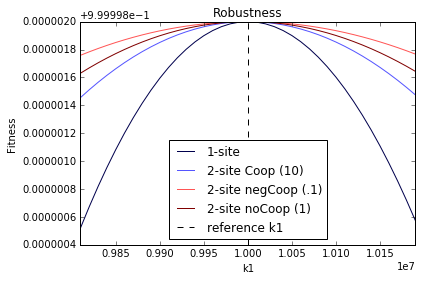

In [42]:
df_dists = pd.DataFrame({"1-site":m1s_dists,
                         "2-site noCoop (1)":m2s_noCoop_dists,
                         "2-site Coop (10)":m2s_Coop_dists,
                         "2-site negCoop (.1)":m2s_negCoop_dists},index=ks)

df_dists.plot(colormap="seismic",legend=False)
plt.ylabel("Fitness")
plt.xlabel("k1")
plt.axvline(x=1e7,color="k",linestyle="--",label="reference k1")
plt.legend(loc=0)
plt.title("Robustness")